In [57]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [68]:
# importing training dataset
cat = "SculptorInSextans"

X_data_train_path = cat+"_8deg/"+cat+"_X_train_region.csv"
z_data_train_path = cat+"_8deg/"+cat+"_z_train_region.csv"

X_data_test_path = cat+"_8deg/"+cat+"_X_test_4deg_region.csv"
z_data_test_path = cat+"_8deg/"+cat+"_z_test_4deg_region.csv"

X_data_train = pd.read_csv(X_data_train_path)
z_data_train = pd.read_csv(z_data_train_path)

X_data_test = pd.read_csv(X_data_test_path)
z_data_test = pd.read_csv(z_data_test_path)

save_path = cat+"_8deg/example_plots/"
if not os.path.exists(save_path):
    os.makedirs(save_path)


In [59]:
X_data_train.head()

,Unnamed: 0,source_id,Xi,Xn,PMra,PMdec,BP0-RP0,G0_c,pmra_error,pmdec_error,bp_rp_error,pmra_pmdec_corr,phot_g_mean_mag_err,phot_bp_mean_mag_err
0,6421,3827513500864597120,0.356555,3.984248,0.994689,-0.318317,0.456929,20.740733,1.669589,1.341070,0.006370,0.077074,0.014165,0.202742
1,6451,3827521850280562176,0.096981,4.002094,-3.131808,-3.117608,0.734295,18.903048,0.257782,0.206064,0.002117,-0.195712,0.003456,0.038356
2,6457,3827524014944075648,0.259689,3.992087,1.655854,-3.696224,0.846854,19.460141,0.469182,0.436600,0.003725,-0.362010,0.004176,0.060277
3,6459,3827524564699891712,0.172473,3.997958,0.075787,-1.911281,0.770782,19.781128,0.516626,0.600900,0.003258,-0.405155,0.004873,0.058913
4,6460,3827524633419367680,0.211044,3.996368,0.074448,-4.806290,0.845466,18.267536,0.205295,0.226969,0.001404,-0.483578,0.003106,0.021351


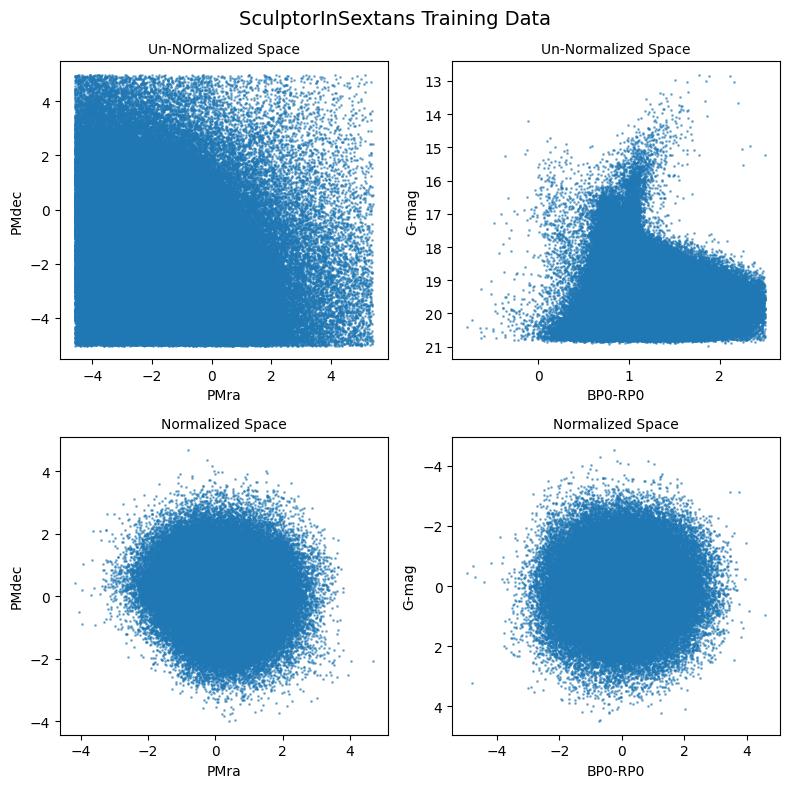

In [60]:
def training_X_z_plot(data_X, data_z, cat):

    fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(8, 8))

    fig.suptitle(f'{cat} Training Data', fontsize=14)

    # X training data plot
    ax1[0].scatter(data_X['PMra'], data_X['PMdec'], s=1, c='tab:blue', alpha=0.5)
    ax1[0].set_title(f'Un-NOrmalized Space', fontsize=10)
    ax1[0].set_xlabel('PMra')
    ax1[0].set_ylabel('PMdec')

    ax1[1].scatter(data_X['BP0-RP0'], data_X['G0_c'], s=1, c='tab:blue', alpha=0.5)
    ax1[1].set_title(f'Un-Normalized Space', fontsize=10)
    ax1[1].set_xlabel('BP0-RP0')
    ax1[1].set_ylabel('G-mag')
    ax1[1].invert_yaxis()

    # z training data plot
    ax2[0].scatter(data_z['PMra'], data_z['PMdec'], s=1, c='tab:blue', alpha=0.5)
    ax2[0].set_title(f'Normalized Space', fontsize=10)
    ax2[0].set_xlabel('PMra')
    ax2[0].set_ylabel('PMdec')

    ax2[1].scatter(data_z['BP0-RP0'], data_z['G0_c'], s=1, c='tab:blue', alpha=0.5)
    ax2[1].set_title(f'Normalized Space', fontsize=10)
    ax2[1].set_xlabel('BP0-RP0')
    ax2[1].set_ylabel('G-mag')
    ax2[1].invert_yaxis()

    plt.tight_layout()
    plt.show()

    return fig


fig_training = training_X_z_plot(X_data_train, z_data_train, cat)
fig_training.savefig(f'{save_path}{cat}_training_X_z_plot.png', dpi=300, bbox_inches='tight')

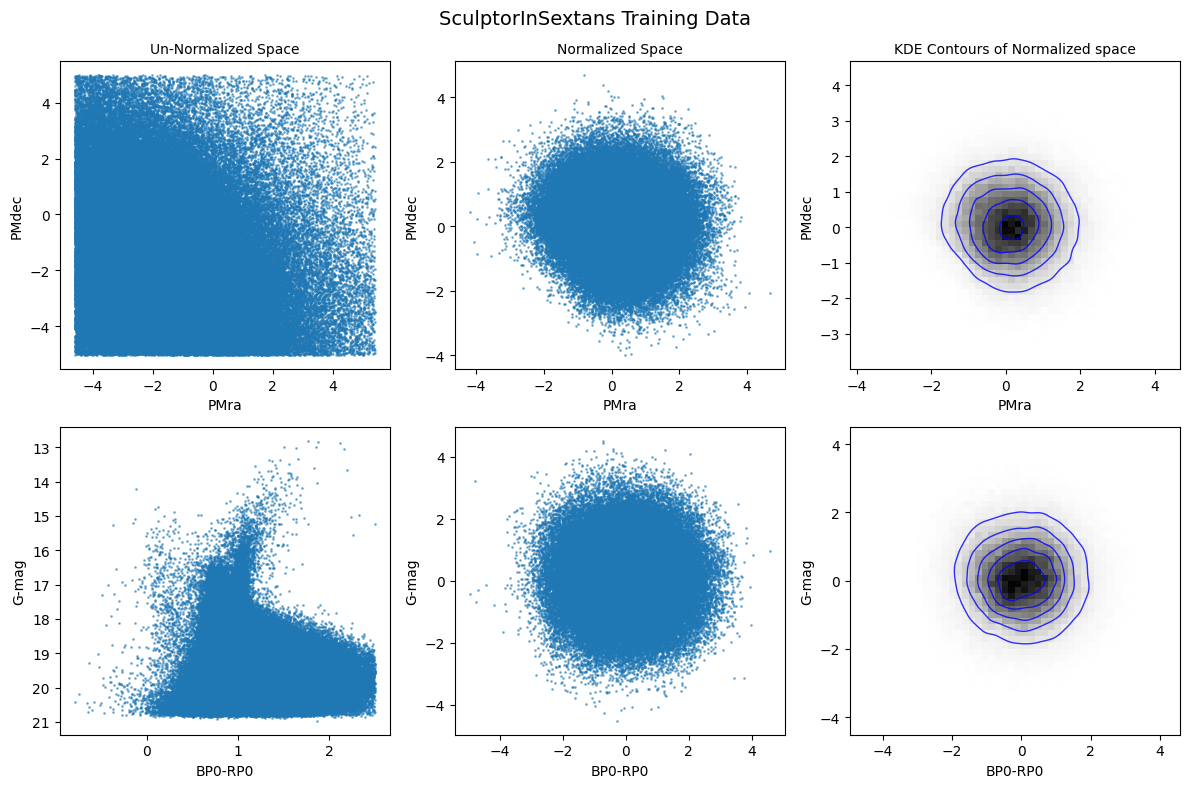

In [61]:
import matplotlib.gridspec as gridspec
from scipy.stats import gaussian_kde

def build_contours(x, y):
  # Define grid for contours
  x_grid = np.linspace(x.min(), x.max(), 100)
  y_grid = np.linspace(y.min(), y.max(), 100)
  X, Y = np.meshgrid(x_grid, y_grid)

  # Use a Gaussian KDE to estimate density
  kde = gaussian_kde(np.vstack([x, y]))
  Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

  return X, Y, Z

def training_X_z_plot_kde(data_X, data_z, cat):

    fig, (ax1, ax2) = plt.subplots(2, 3, figsize=(12, 8))

    fig.suptitle(f'{cat} Training Data', fontsize=14)

    # PM
    ax1[0].scatter(data_X['PMra'], data_X['PMdec'], s=1, c='tab:blue', alpha=0.5)
    ax1[0].set_title(f'Un-Normalized Space', fontsize=10)
    ax1[0].set_xlabel('PMra')
    ax1[0].set_ylabel('PMdec')

    ax1[1].scatter(data_z['PMra'], data_z['PMdec'], s=1, c='tab:blue', alpha=0.5)
    ax1[1].set_title(f'Normalized Space', fontsize=10)
    ax1[1].set_xlabel('PMra')
    ax1[1].set_ylabel('PMdec')

    X, Y, Z = build_contours(data_z['PMra'], data_z['PMdec'])
    ax1[2].hist2d(data_z['PMra'], data_z['PMdec'], bins=50, cmap='Greys')
    ax1[2].contour(X, Y, Z, colors="blue", levels=5, linewidths=1.0, alpha=0.8)
    ax1[2].set_title('KDE Contours of Normalized space', fontsize=10)
    ax1[2].set_xlabel('PMra')
    ax1[2].set_ylabel('PMdec')

    # CMD
    ax2[0].scatter(data_X['BP0-RP0'], data_X['G0_c'], s=1, c='tab:blue', alpha=0.5)
    ax2[0].set_xlabel('BP0-RP0')
    ax2[0].set_ylabel('G-mag')
    ax2[0].invert_yaxis()

    ax2[1].scatter(data_z['BP0-RP0'], data_z['G0_c'], s=1, c='tab:blue', alpha=0.5)
    ax2[1].set_xlabel('BP0-RP0')
    ax2[1].set_ylabel('G-mag')

    X, Y, Z = build_contours(data_z['BP0-RP0'], data_z['G0_c'])
    ax2[2].hist2d(data_z['BP0-RP0'], data_z['G0_c'], bins=50, cmap='Greys')
    ax2[2].contour(X, Y, Z, colors="blue", levels=5, linewidths=1.0, alpha=0.8)
    ax2[2].set_xlabel('BP0-RP0')
    ax2[2].set_ylabel('G-mag')

    plt.tight_layout()
    plt.show()

    return fig

fig_training_kde = training_X_z_plot_kde(X_data_train, z_data_train, cat)
fig_training_kde.savefig(f'{save_path}{cat}_training_X_z_plot_kde.png', dpi=300, bbox_inches='tight')

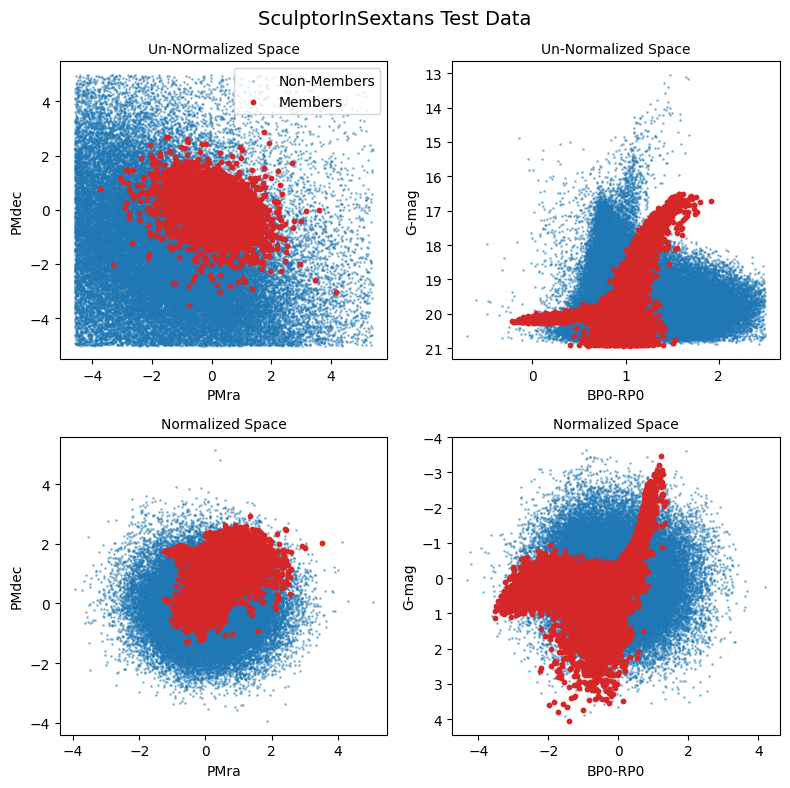

In [62]:
def test_X_z_plot(data_X, data_z, cat):

    members_indices = data_X[data_X["source_id"] == 42].index

    fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(8, 8))

    fig.suptitle(f'{cat} Test Data', fontsize=14)

    # X training data plot
    ax1[0].scatter(data_X['PMra'], data_X['PMdec'], s=1, c='tab:blue', alpha=0.4)
    ax1[0].scatter(data_X.loc[members_indices,'PMra'], data_X.loc[members_indices,'PMdec'], s=10, c='tab:red', alpha=1.0)
    ax1[0].set_title(f'Un-NOrmalized Space', fontsize=10)
    ax1[0].set_xlabel('PMra')
    ax1[0].set_ylabel('PMdec')
    ax1[0].legend(['Non-Members', 'Members'], loc='upper right')

    ax1[1].scatter(data_X['BP0-RP0'], data_X['G0_c'], s=1, c='tab:blue', alpha=0.4)
    ax1[1].scatter(data_X.loc[members_indices,'BP0-RP0'], data_X.loc[members_indices,'G0_c'], s=10, c='tab:red', alpha=1.0)
    ax1[1].set_title(f'Un-Normalized Space', fontsize=10)
    ax1[1].set_xlabel('BP0-RP0')
    ax1[1].set_ylabel('G-mag')
    ax1[1].invert_yaxis()

    # z training data plot
    ax2[0].scatter(data_z['PMra'], data_z['PMdec'], s=1, c='tab:blue', alpha=0.4)
    ax2[0].scatter(data_z.loc[members_indices,'PMra'], data_z.loc[members_indices,'PMdec'], s=10, c='tab:red', alpha=1.0)
    ax2[0].set_title(f'Normalized Space', fontsize=10)
    ax2[0].set_xlabel('PMra')
    ax2[0].set_ylabel('PMdec')

    ax2[1].scatter(data_z['BP0-RP0'], data_z['G0_c'], s=1, c='tab:blue', alpha=0.4)
    ax2[1].scatter(data_z.loc[members_indices,'BP0-RP0'], data_z.loc[members_indices,'G0_c'], s=10, c='tab:red', alpha=1.0)
    ax2[1].set_title(f'Normalized Space', fontsize=10)
    ax2[1].set_xlabel('BP0-RP0')
    ax2[1].set_ylabel('G-mag')
    ax2[1].invert_yaxis()

    plt.tight_layout()
    plt.show()

    return fig

fig_test = test_X_z_plot(X_data_test, z_data_test, cat)
fig_test.savefig(f'{save_path}{cat}_test_X_z_plot.png', dpi=300, bbox_inches='tight')

Original non members of z_test: 52988
New shape of z_test: (22342, 14)


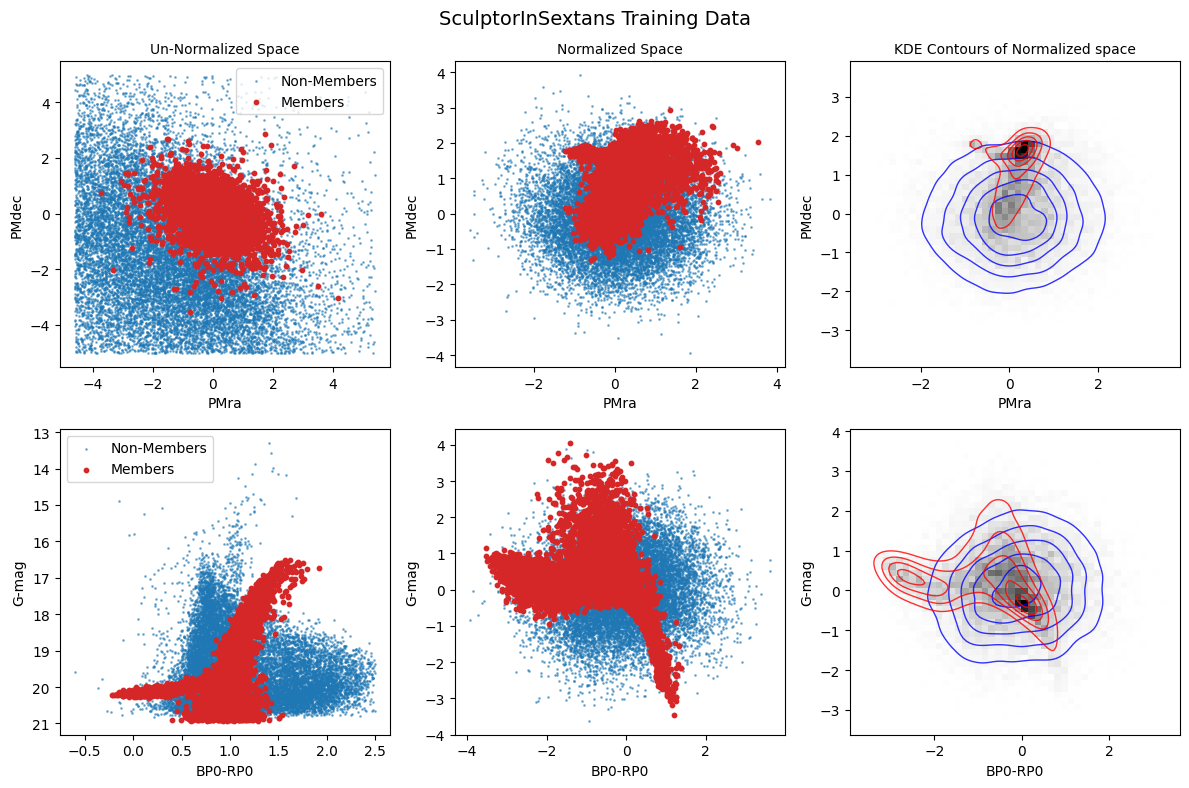

In [70]:
def test_X_z_plot_kde(data_X, data_z, cat):

    # Filter rows where 'source_id' is different from 42
    non_members = data_z[data_z['source_id'] != 42]
    print(f"Original non members of z_test: {len(non_members)}")

    # Select 40,000 rows to drop
    rows_to_drop = non_members.sample(n=37000, random_state=42).index

    # Drop the selected rows
    data_z = data_z.drop(index=rows_to_drop).reset_index(drop=True)

    print(f"New shape of z_test: {data_z.shape}")

    # TAKING THE MEMNBER INDICES
    members_indices = np.where(data_z['source_id'] == 42)[0]
    non_members_indices = np.where(data_z['source_id'] != 42)[0]

    #members_indices = data_X[data_X["source_id"] == 42].index
    #non_members_indices = data_X[data_X["source_id"] != 42].index

    fig, (ax1, ax2) = plt.subplots(2, 3, figsize=(12, 8))

    fig.suptitle(f'{cat} Training Data', fontsize=14)

    # PM
    ax1[0].scatter(data_X.loc[non_members_indices,'PMra'], data_X.loc[non_members_indices,'PMdec'], s=1, c='tab:blue', alpha=0.5)
    ax1[0].scatter(data_X.loc[members_indices,'PMra'], data_X.loc[members_indices,'PMdec'], s=10, c='tab:red', alpha=1.0)
    ax1[0].set_title(f'Un-Normalized Space', fontsize=10)
    ax1[0].set_xlabel('PMra')
    ax1[0].set_ylabel('PMdec')
    ax1[0].legend(['Non-Members', 'Members'], loc='upper right')

    ax1[1].scatter(data_z.loc[non_members_indices,'PMra'], data_z.loc[non_members_indices,'PMdec'], s=1, c='tab:blue', alpha=0.5)
    ax1[1].scatter(data_z.loc[members_indices,'PMra'], data_z.loc[members_indices,'PMdec'], s=10, c='tab:red', alpha=1.0)
    ax1[1].set_title(f'Normalized Space', fontsize=10)
    ax1[1].set_xlabel('PMra')
    ax1[1].set_ylabel('PMdec')

    X_c, Y_c, Z_c = build_contours(data_z.loc[non_members_indices,'PMra'], data_z.loc[non_members_indices,'PMdec'])
    ax1[2].hist2d(data_z['PMra'], data_z['PMdec'], bins=50, cmap='Greys')
    ax1[2].contour(X_c, Y_c, Z_c, colors="blue", levels=5, linewidths=1.0, alpha=0.8)
    X_m, Y_m, Z_m = build_contours(data_z.loc[members_indices,'PMra'], data_z.loc[members_indices,'PMdec'])
    ax1[2].contour(X_m, Y_m, Z_m, colors="red", levels=5, linewidths=1.0, alpha=0.8)
    ax1[2].set_title('KDE Contours of Normalized space', fontsize=10)
    ax1[2].set_xlabel('PMra')
    ax1[2].set_ylabel('PMdec')

    # CMD
    ax2[0].scatter(data_X.loc[non_members_indices,'BP0-RP0'], data_X.loc[non_members_indices,'G0_c'], s=1, c='tab:blue', alpha=0.5)
    ax2[0].scatter(data_X.loc[members_indices,'BP0-RP0'], data_X.loc[members_indices,'G0_c'], s=10, c='tab:red', alpha=1.0)
    ax2[0].set_xlabel('BP0-RP0')
    ax2[0].set_ylabel('G-mag')
    ax2[0].invert_yaxis()
    ax2[0].legend(['Non-Members', 'Members'], loc='upper left')

    ax2[1].scatter(data_z.loc[non_members_indices,'BP0-RP0'], data_z.loc[non_members_indices,'G0_c'], s=1, c='tab:blue', alpha=0.5)
    ax2[1].scatter(data_z.loc[members_indices,'BP0-RP0'], data_z.loc[members_indices,'G0_c'], s=10, c='tab:red', alpha=1.0)
    ax2[1].set_xlabel('BP0-RP0')
    ax2[1].set_ylabel('G-mag')

    X_c, Y_c, Z_c = build_contours(data_z.loc[non_members_indices,'BP0-RP0'], data_z.loc[non_members_indices,'G0_c'])
    ax2[2].hist2d(data_z['BP0-RP0'], data_z['G0_c'], bins=50, cmap='Greys')
    ax2[2].contour(X_c, Y_c, Z_c, colors="blue", levels=5, linewidths=1.0, alpha=0.8)
    X_m, Y_m, Z_m = build_contours(data_z.loc[members_indices,'BP0-RP0'], data_z.loc[members_indices,'G0_c'])
    ax2[2].contour(X_m, Y_m, Z_m, colors="red", levels=5, linewidths=1.0, alpha=0.8)
    ax2[2].set_xlabel('BP0-RP0')
    ax2[2].set_ylabel('G-mag')

    plt.tight_layout()
    plt.show()

    return fig

fig_test_kde = test_X_z_plot_kde(X_data_test, z_data_test, cat)
fig_test_kde.savefig(f'{save_path}{cat}_test_X_z_plot_kde.png', dpi=300, bbox_inches='tight')